# Project ML

In [78]:
import pandas as pd  

In [79]:
df = pd.read_csv('/Users/winstonbudihartono/Desktop/MY-DAC-Curriculum/Internal Project/cleaned_file.csv')

## Machine Learning

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

In [81]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [83]:
# Combine "Normal" and "Abnormal" into a new category "Evaluated"
df['Test Results'] = df['Test Results'].replace({'Normal': 'Evaluated', 'Abnormal': 'Evaluated'})

# Display the updated column to verify the changes
df['Test Results'].value_counts()

Test Results
Evaluated       36768
Inconclusive    18198
Name: count, dtype: int64

In [85]:
label_encoder = LabelEncoder()

# Apply Label Encoding to all object type columns in the dataset
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                        Name       Age    Gender  Blood Type  \
Name                1.000000  0.001151  0.007992   -0.001075   
Age                 0.001151  1.000000 -0.002510   -0.000031   
Gender              0.007992 -0.002510  1.000000   -0.000690   
Blood Type         -0.001075 -0.000031 -0.000690    1.000000   
Medical Condition   0.003250 -0.002800  0.000746   -0.004183   
Date of Admission   0.003662 -0.000877  0.001649   -0.000147   
Doctor             -0.005099 -0.003225 -0.002916   -0.004764   
Hospital            0.003629  0.001728  0.003262   -0.000457   
Insurance Provider -0.001197 -0.005222 -0.003267   -0.001097   
Billing Amount     -0.001584 -0.003427  0.004939   -0.000575   
Room Number        -0.001004 -0.000352 -0.006764    0.004465   
Admission Type      0.004086  0.004098  0.009642   -0.004305   
Discharge Date      0.003678 -0.000748  0.001718   -0.000175   
Medication          0.000286 -0.006073  0.007855    0.002778   
Test Results        0.008979  0.004450 -

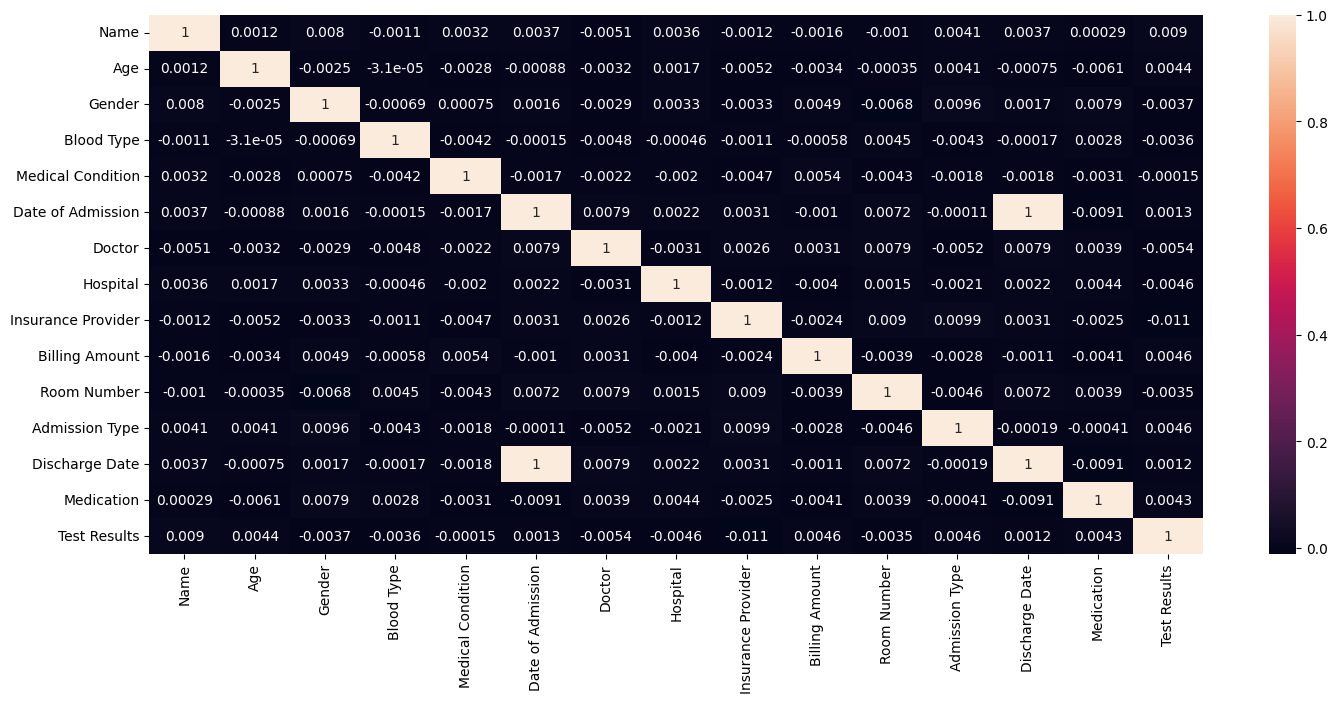

In [86]:
corr_matrix = df.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(17,7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Random Forrest

In [ ]:
##Splitting data into x & y

X = df.drop(columns=['Name', 'Date of Admission', 'Discharge Date', 'Test Results'],axis=1)
y = df['Test Results']

In [101]:
# Do Label encoding on y label

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [102]:
# Import category encoder and perfom on X data

import category_encoders as ce
X = ce.TargetEncoder(smoothing=0).fit_transform(X,y)

In [103]:
#Train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(43972, 11) (10994, 11)


In [104]:
#Standarscaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
X_train.shape

(43972, 11)

In [106]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(class_weight='balanced', random_state=42)
random.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [107]:
pred_2 = random.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score
acc = accuracy_score (y_test, pred_2)
print("Acc: %.2f%%" % (acc * 100.0))

Acc: 71.25%


## Binary Logistic Regression

Accuracy: 0.707022012006549
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.98      0.82      7312
           1       0.82      0.16      0.27      3682

    accuracy                           0.71     10994
   macro avg       0.76      0.57      0.54     10994
weighted avg       0.74      0.71      0.63     10994

Confusion Matrix:
 [[7183  129]
 [3092  590]]
Predicted Test Result: 0


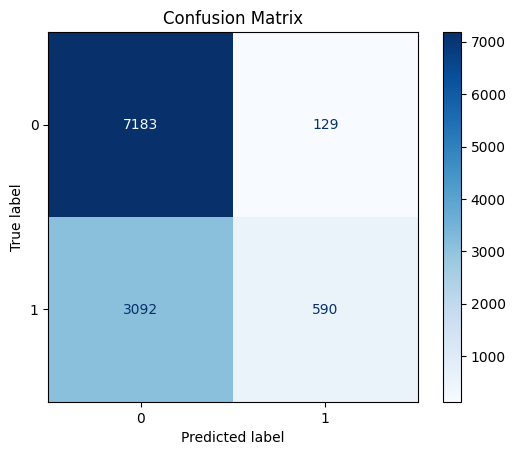

In [110]:
# Target variable: 'Test Results'
target = 'Test Results'

# Step 1: Preprocess the data
# Drop irrelevant columns (e.g., names, dates, billing amounts, room numbers)
irrelevant_columns = ['Name', 'Date of Admission', 'Room Number', 'Discharge Date']
dataset = df.drop(columns=irrelevant_columns)

# Encode categorical variables
categorical_columns = ['Age', 'Gender', 'Blood Type', "Billing Amount", 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication']
encoder = LabelEncoder()
for col in categorical_columns:
    dataset[col] = encoder.fit_transform(dataset[col])

# Separate features and target variable
X = dataset.drop(columns=[target])
y = dataset[target]

# Encode the target variable
y = encoder.fit_transform(y)

# Normalize numerical columns (optional, depending on the model)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# Classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 5: Make predictions (example)
sample_input = X_test[0]  # Example: first row from test set
predicted_class = model.predict([sample_input])
predicted_label = encoder.inverse_transform(predicted_class)
print("Predicted Test Result:", predicted_label[0])

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Class distribution after SMOTE:
1    29414
0    29414
Name: count, dtype: int64
Accuracy: 0.6936510824085865
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80      7354
           1       0.61      0.21      0.31      3640

    accuracy                           0.69     10994
   macro avg       0.66      0.57      0.56     10994
weighted avg       0.67      0.69      0.64     10994

Confusion Matrix:
 [[6859  495]
 [2873  767]]
Predicted Test Result: 0


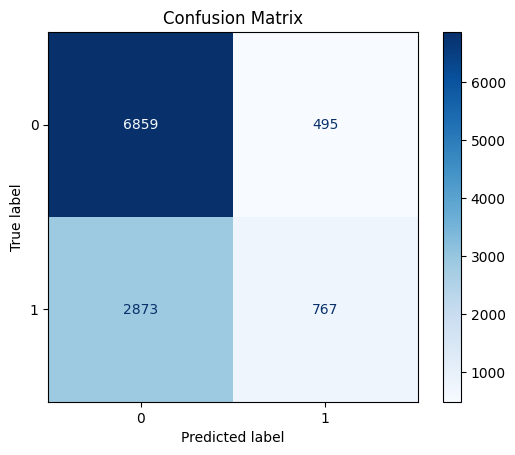

In [ ]:
from imblearn.over_sampling import SMOTE

# Target variable: 'Test Results'
target = 'Test Results'

# Step 1: Preprocess the data
# Drop irrelevant columns (e.g., names, dates, billing amounts, room numbers)
irrelevant_columns = ['Name', 'Date of Admission', 'Room Number', 'Discharge Date']
dataset = df.drop(columns=irrelevant_columns)

# Encode categorical variables
categorical_columns = ['Age', 'Gender', 'Blood Type', "Billing Amount", 'Medical Condition', 
                       'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication']
encoder = LabelEncoder()
for col in categorical_columns:
    dataset[col] = encoder.fit_transform(dataset[col])

# Separate features and target variable
X = dataset.drop(columns=[target])
y = dataset[target]

# Encode the target variable
y = encoder.fit_transform(y)

# Normalize numerical columns (optional, depending on the model)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Step 4: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Make predictions (example)
sample_input = X_test[0]  # Example: first row from test set
predicted_class = model.predict([sample_input])
predicted_label = encoder.inverse_transform(predicted_class)
print("Predicted Test Result:", predicted_label[0])

# Step 7: Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Class distribution after SMOTE:
1    29414
0    29414
Name: count, dtype: int64
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced'}
Accuracy: 0.45361106057849737
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.24      0.37      7354
           1       0.37      0.89      0.52      3640

    accuracy                           0.45     10994
   macro avg       0.59      0.56      0.44     10994
weighted avg       0.66      0.45      0.42     10994

Confusion Matrix:
 [[1759 5595]
 [ 412 3228]]


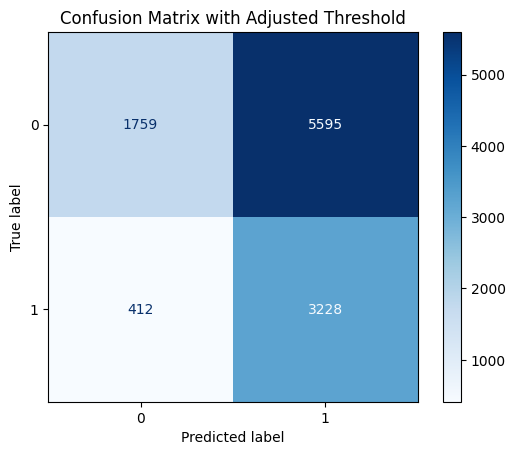

Predicted Test Result: 1


In [ ]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
# from imblearn.over_sampling import SMOTE
# import matplotlib.pyplot as plt

# # Target variable: 'Test Results'
# target = 'Test Results'

# # Step 1: Preprocess the data
# # Drop irrelevant columns (e.g., names, dates, billing amounts, room numbers)
# irrelevant_columns = ['Name', 'Date of Admission', 'Room Number', 'Discharge Date']
# dataset = df.drop(columns=irrelevant_columns)

# # Encode categorical variables
# categorical_columns = ['Age', 'Gender', 'Blood Type', "Billing Amount", 'Medical Condition', 
#                        'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication']
# encoder = LabelEncoder()
# for col in categorical_columns:
#     dataset[col] = encoder.fit_transform(dataset[col])

# # Separate features and target variable
# X = dataset.drop(columns=[target])
# y = dataset[target]

# # Encode the target variable
# y = encoder.fit_transform(y)

# # Normalize numerical columns
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Step 2: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Step 3: Apply SMOTE to handle class imbalance
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# print("Class distribution after SMOTE:")
# print(pd.Series(y_train_resampled).value_counts())

# # Step 4: Hyperparameter tuning for Random Forest
# param_distributions = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'class_weight': ['balanced']  # Give equal weight to minority class
# }

# rf = RandomForestClassifier(random_state=42)
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
#                                    n_iter=10, cv=3, random_state=42, n_jobs=-1, verbose=1)
# random_search.fit(X_train_resampled, y_train_resampled)

# # Best model after hyperparameter tuning
# best_model = random_search.best_estimator_
# print("Best Parameters:", random_search.best_params_)

# # Step 5: Evaluate the model on the test set
# y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# # Adjust decision threshold to improve recall for class 1
# precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# # Find the threshold where recall is improved (customize this value as needed)
# best_threshold = 0.3  # Example threshold for boosting recall
# y_pred_thresholded = (y_proba >= best_threshold).astype(int)

# # Classification metrics
# print("Accuracy:", accuracy_score(y_test, y_pred_thresholded))
# print("Classification Report:\n", classification_report(y_test, y_pred_thresholded))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresholded))

# # Step 6: Display the confusion matrix
# cm = confusion_matrix(y_test, y_pred_thresholded)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix with Adjusted Threshold')
# plt.show()

# # Step 7: Make predictions (example)
# sample_input = X_test[0]  # Example: first row from test set
# predicted_class = (best_model.predict_proba([sample_input])[:, 1] >= best_threshold).astype(int)
# predicted_label = encoder.inverse_transform(predicted_class)
# print("Predicted Test Result:", predicted_label[0])


In [98]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# # Step 1: Load and prepare the data
# # Assuming `data` is already loaded and "Test Results" column is updated.
# # Convert "Test Results" to binary labels: "Evaluated" = 1, "Inconclusive" = 0
# # df['Test Results Binary'] = df['Test Results'].map({'Evaluated': 1, 'Inconclusive': 0})

# # Select relevant features (independent variables) and target (dependent variable)
# # Drop unnecessary columns (modify based on your dataset)
# X = df.drop(columns=['Test Results', 'Name', 'Discharge Date', 'Date of Admission'])

# y = df['Test Results']

# # Convert categorical variables to dummy variables
# X = pd.get_dummies(X, drop_first=True)

# # Step 2: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 3: Fit the Logistic Regression Model
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train, y_train)

# # Step 4: Make predictions
# y_pred = model.predict(X_test)
# y_pred_prob = model.predict_proba(X_test)[:, 1]

# # Step 5: Evaluate the Model
# accuracy = accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_prob)
# report = classification_report(y_test, y_pred)

# # Print evaluation metrics
# print("Accuracy:", accuracy)
# print("ROC-AUC Score:", roc_auc)
# print("Classification Report:\n", report)

# # # Optional: Display feature importance (coefficients)
# # coefficients = pd.DataFrame({
# #     'Feature': X.columns,
# #     'Coefficient': model.coef_[0]
# # }).sort_values(by='Coefficient', ascending=False)
# # print("Feature Importance:\n", coefficients)


In [99]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE

# # Step 1: Load and prepare the data
# # Assuming `data` is already loaded and "Test Results" column is updated.
# # Convert "Test Results" to binary labels: "Evaluated" = 1, "Inconclusive" = 0
# # df['Test Results Binary'] = df['Test Results'].map({'Evaluated': 1, 'Inconclusive': 0})

# # Select relevant features (independent variables) and target (dependent variable)
# # Drop unnecessary columns (modify based on your dataset)
# X = df.drop(columns=['Test Results', 'Name', 'Discharge Date', 'Date of Admission'])

# y = df['Test Results']

# # Convert categorical variables to dummy variables
# X = pd.get_dummies(X, drop_first=True)

# # Step 2: Scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Step 3: Handle class imbalance with SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# # Step 4: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# # Step 5: Fit the Logistic Regression Model with increased iterations and class weights
# model = LogisticRegression(max_iter=1000, class_weight='balanced')
# model.fit(X_train, y_train)

# # Step 6: Make predictions
# y_pred = model.predict(X_test)
# y_pred_prob = model.predict_proba(X_test)[:, 1]

# # Step 7: Evaluate the Model
# accuracy = accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_prob)
# report = classification_report(y_test, y_pred, zero_division=1)

# # Print evaluation metrics
# print("Accuracy:", accuracy)
# print("ROC-AUC Score:", roc_auc)
# print("Classification Report:\n", report)

# # Optional: Display feature importance (coefficients)
# coefficients = pd.DataFrame({
#     'Feature': X.columns,
#     'Coefficient': model.coef_[0]
# }).sort_values(by='Coefficient', ascending=False)
# print("Feature Importance:\n", coefficients)
